# Ideal ORE

## Posterior Bayes Vulnerability

In [1]:
import collections
import math
import numpy as np
import pandas as pd
from scipy.special import perm # for nPk
from sympy.utilities.iterables import partitions
from sympy.functions.combinatorial.numbers import stirling
from decimal import Decimal
import matplotlib.pyplot as plt 
pd.set_option('precision', 10)
%matplotlib inline

__uni_ore_bayes__ calculates the posterior Bayes vulnerability for ideal Order Revealing Encryption (ORE). Only works on a uniform prior for now. 

Number of channel outputs over number of channel inputs

$$ V_1 [C \triangleright \pi ]  = \sum_{i=1}^{n} \frac{\text{stirling2}(n, i)\times i!}{\text{stirling2}(n, i)\times kPi}  $$


c_sum:= number of cases, a sum of the stirling number of the second kind (n, i) times i!

num_channel_rows := number of total rows in the channel, a sum of the stirling number of the second kind (n, i) times the number of permutations kPn.

In [2]:
def uni_ore_bayes(n, k):
    c_sum = 0
    num_channel_rows = 0
    for c in range(n):
        if k < c+1:
            break
        s2 = stirling(n, c+1)
        c_sum = c_sum + (math.factorial(c+1) * s2)
        num_channel_rows = num_channel_rows + (perm(k, c+1) * s2)
    bayes = c_sum / num_channel_rows
    return bayes

In [3]:
def df_uni_ore_bayes(n_range, k):
    n = 0
    n_list = []
    prior_list = []
    post_list = []
    for x in range(n_range):
        n = n + 1
        n_list.append(n)
        prior = pow(1/k, n)
        prior_list.append(prior)
        post = uni_ore_bayes(n, k)
        post_list.append(post)
    df = pd.DataFrame(
        {'n':n_list,
         'prior':prior_list,
         'posterior':post_list
        }
    )
    return df

## Tests

Matches Kuifje code

| N   | K   | Inners (total) | Inners (shape) | Kuifje     | Calc |
| --- | --- | ---            | ---          | ---          | ---  |
| 4   |  3  | 51             | 2            | 17/27        | 0.6296| 
| 4   | 10  | 75             | 4            | 3/400        | 0.0075 |
| 4   | 20  | 75             | 4            | 3/6400       | 0.00047 |
| 5   | 10  | 541            | 5            | 541/100000   | 0.0054 |
| 5   | 20  | 541            | 5            | 541/3200000  | 0.000169 |

In [4]:
n = 4
k = 3
bayes = uni_ore_bayes(n, k)
print("Bayes: ", bayes)

Bayes:  0.629629629629630


In [5]:
n = 4
k = 10
bayes = uni_ore_bayes(n, k)
print("Bayes: ", bayes)

Bayes:  0.00750000000000000


In [6]:
n = 4
k = 20
bayes = uni_ore_bayes(n, k)
print("Bayes: ", bayes)

Bayes:  0.000468750000000000


In [7]:
n = 5
k = 10
bayes = uni_ore_bayes(n, k)
print("Bayes: ", bayes)

Bayes:  0.00541000000000000


In [8]:
n = 5
k = 20
bayes = uni_ore_bayes(n, k)
print("Bayes: ", bayes)

Bayes:  0.000169062500000000


## Graphs

In [9]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
font_choice = 14
plt.rcParams.update(plt.rcParamsDefault)
rc_fonts = {
    "text.usetex": True,
    "font.size": font_choice,
    'mathtext.default': 'regular',
    'axes.titlesize': font_choice,
    "axes.labelsize": font_choice,
    "legend.fontsize": font_choice,
    "xtick.labelsize": font_choice,
    "ytick.labelsize": font_choice,
    'figure.titlesize': font_choice,
    'figure.figsize': (8,5.25),
    'text.latex.preamble': [r'\usepackage{amsmath,nicefrac, sansmath}', 
                            r'\sansmath'],
    "font.family": "sans-serif",#"font.sans-serif": "computer modern",
    }
mpl.rcParams.update(rc_fonts)

In [10]:
def graph_it_bayes(n_range, k, df):
    ax = plt.figure().gca()
    plt.plot('n', 'prior', 
             data=df,
             label="prior")
    plt.plot('n', 'posterior',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="posterior")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('n')
    plt.xlim(left = 0, right = n_range+1)
    plt.ylabel('Bayes vulnerability')
    plt.ylim(bottom=-.1, top = 1)
    
    plt.title('Bayes vulnerability, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

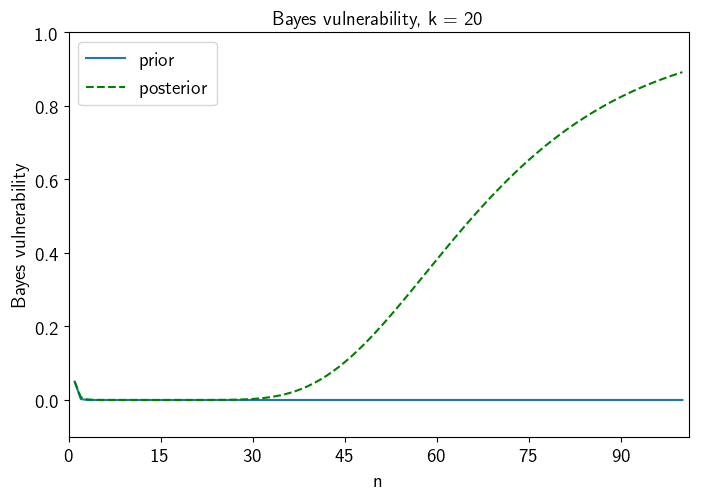

In [11]:
n_range = 100
k = 20
df = df_uni_ore_bayes(n_range, k)
graph_it_bayes(n_range, k, df)

In [12]:
df

,n,prior,posterior
0,1,5.0000000000e-02,0.0500000000000000
1,2,2.5000000000e-03,0.00750000000000000
2,3,1.2500000000e-04,0.00162500000000000
3,4,6.2500000000e-06,0.000468750000000000
4,5,3.1250000000e-07,0.000169062500000000
5,6,1.5625000000e-08,7.31718750000000e-5
6,7,7.8125000000e-10,3.69476562500000e-5
7,8,3.9062500000e-11,2.13216796875000e-5
8,9,1.9531250000e-12,1.38423066406250e-5
9,10,9.7656250000e-14,9.98511357421875e-6


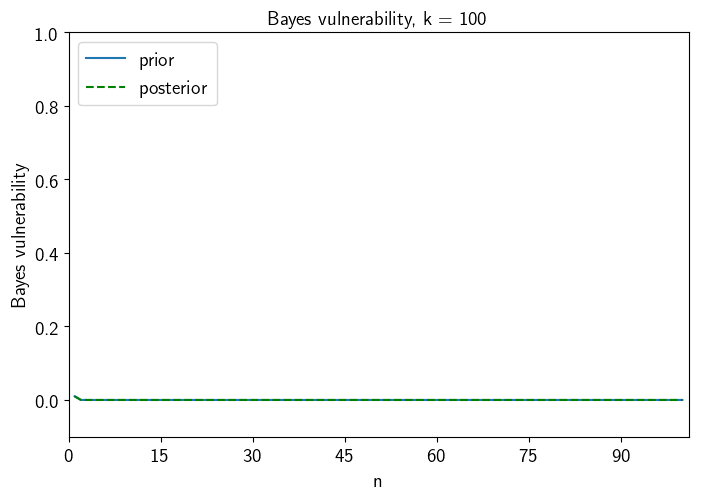

In [13]:
n_range = 100
k = 100
df = df_uni_ore_bayes(n_range, k)
graph_it_bayes(n_range, k, df)